In [2]:
%reload_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir))
print(f"notebook_dir: {notebook_dir}")
print(f"Calculated project_root: {project_root}")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

notebook_dir: d:\Isaac\Dev\ReflectoLearn\notebooks
Calculated project_root: d:\Isaac\Dev\ReflectoLearn


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from reflectolearn.data_processing.simulate import make_parameters, add_xrr_noise, structure2R, make_n_layer_structure

In [10]:
n: int = 5
thicknesses, roughnesses, slds = make_parameters(n)
for thickness, roughness, sld in zip(thicknesses, roughnesses, slds):
    print(f"thickness: {thickness}")
    print(f'rougnness: {roughness}')
    print(f'sld: {sld}')

thickness: 393.23804403227194
rougnness: 157.2952176129088
sld: 6.819634875776501
thickness: 778.8992268285367
rougnness: 311.5596907314147
sld: 11.502403949952374
thickness: 308.5427793057507
rougnness: 123.41711172230028
sld: 8.767444743832765
thickness: 761.7058637211147
rougnness: 304.6823454884459
sld: 6.106065828183763
thickness: 838.0266473077455
rougnness: 335.2106589230982
sld: 3.5869779620332114


In [11]:
structure = make_n_layer_structure(thicknesses, roughnesses, slds)
print(structure)

________________________________________________________________________________
Structure:                
solvent: None
reverse structure: False
contract: 0

________________________________________________________________________________
Parameters:      'Air'     
<Parameter: 'Air - thick' , value=0  (fixed) , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters:      'Air'     
<Parameter:  'Air - sld'  , value=0  (fixed) , bounds=[-inf, inf]>
<Parameter: 'Air - isld'  , value=0  (fixed) , bounds=[-inf, inf]>
<Parameter: 'Air - rough' , value=0  (fixed) , bounds=[-inf, inf]>
<Parameter:'Air - volfrac solvent', value=0  (fixed) , bounds=[0.0, 1.0]>
Stack start: 5 repeats
________________________________________________________________________________
Parameters: 'Film SLD=6.819634875776501'
<Parameter:'Film SLD=6.819634875776501 - thick', value=393.238  (fixed) , bounds=[-inf, inf]>
_________________________________________

[]

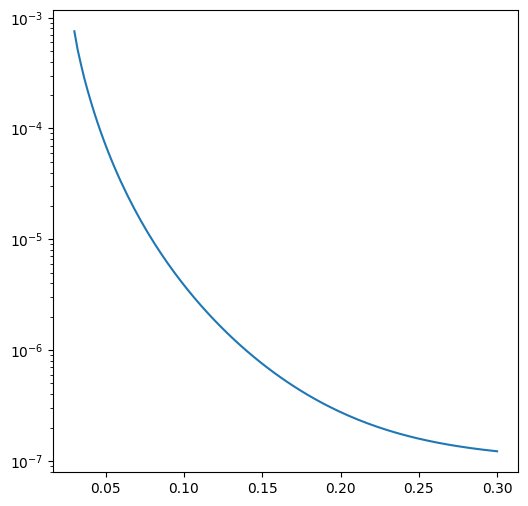

In [14]:
q = np.linspace(0.03, 0.3, 128)
R = structure2R(structure, q)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(q, R)
ax.semilogy()